In [6]:
from jax import lax, vmap
import jax.numpy as jnp
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def weight_condition(condition,u,mu,sigma):
    w = lax.cond(condition, lambda u: (1 + jnp.cos(math.pi*(u-mu)/sigma))**2, lambda _: 0., u)
    return w

# Changed this function
def w_jl(j, l, u):
    # mu = self.Tmax*(j-1)/(l-1) # j starts at zero
    mu = j/(l-1)
    sigma = (1.9/2.0)/(l-1)
    conditions = (u < (mu + sigma)) & (u > (mu - sigma))
    w_jl = vmap(weight_condition,(0,0,None,None))(conditions,u,mu,sigma)
    return w_jl

0.0
0.31666666666666665
0.3333333333333333
0.31666666666666665
0.6666666666666666
0.31666666666666665
1.0
0.31666666666666665


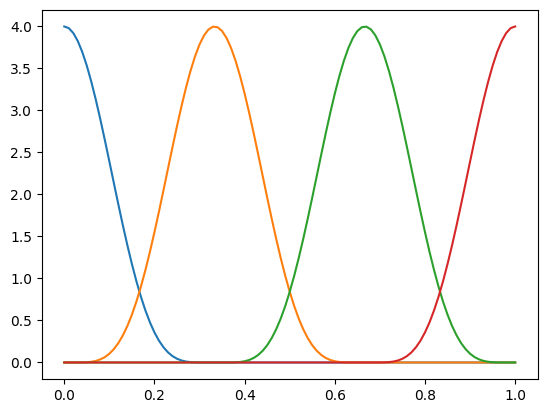

In [4]:
for j in range(4):
    l = 4
    mu = j/(l-1)
    sigma = (1.9/2.0)/(l-1)
    print(mu)
    print(sigma)
    x = jnp.linspace(0,1,101)
    plt.plot(x,w_jl(j,l,x))

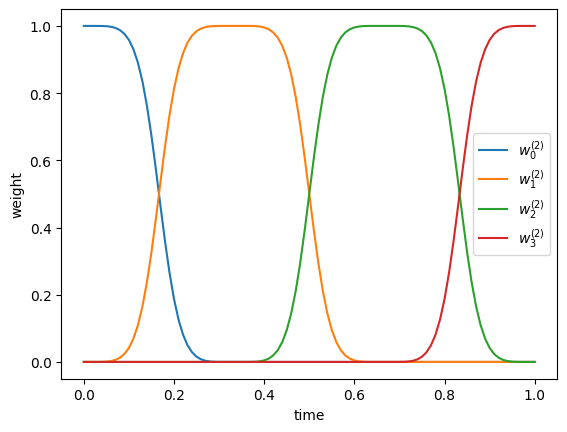

In [13]:
l = 4
sigma = (1.9/2.0)/(l-1)
x = np.linspace(0,1,101)
w = np.zeros((4,101))
w_sum = np.zeros(101)
for j in range(4):
    mu = j/(l-1)
    w[j,:] = w_jl(j,l,x)
    w_sum += w[j,:]
w = w / w_sum

for j in range(4):
    plt.plot(x,w[j,:], label = '$w_{%i}^{(2)}$' % j)

plt.ylabel('weight')
plt.xlabel('time')
plt.legend()
plt.show()

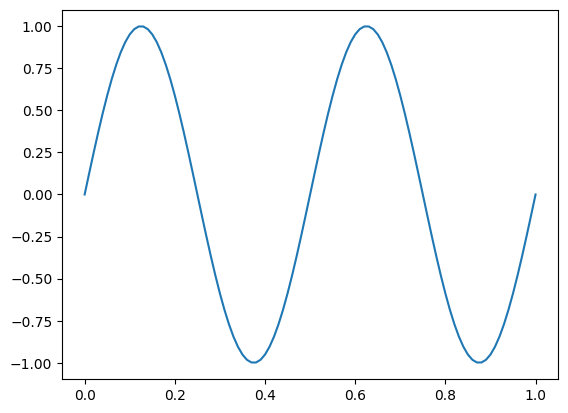

In [18]:
sin4x = jnp.sin(4*math.pi*x)
weight_sum = 0.
approx = 0.
for i in range(4):
    weight = w_jl(i,4,x)
    approx += weight*sin4x
    weight_sum += weight

plt.plot(x,approx/weight_sum)